In [ ]:
# @title IMPORT DRIVER

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title UNZIP DATA
!unzip /content/drive/MyDrive/BTL_TTCS/dataset_raw/Fall_Detection.v4-resized640_aug3x-accurate.yolov5pytorch.zip -d /content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset1
!unzip /content/drive/MyDrive/BTL_TTCS/dataset_raw/UR_Fall_Detection_Dataset.v1i.yolov5pytorch.zip -d /content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2
!unzip /content/drive/MyDrive/BTL_TTCS/dataset_raw/Fall_Detection.v2i.yolov5pytorch.zip -d /content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset4



Archive:  /content/drive/MyDrive/BTL_TTCS/dataset_raw/Fall_Detection.v4-resized640_aug3x-accurate.yolov5pytorch.zip
replace /content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset1/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/BTL_TTCS/dataset_raw/UR_Fall_Detection_Dataset.v1i.yolov5pytorch.zip
replace /content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/BTL_TTCS/dataset_raw/Fall_Detection.v2i.yolov5pytorch.zip
replace /content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset4/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# @title CHECK DATA
# Data ngon vcl cảm ơn chị Hồng Nguyễn

In [ ]:
# @title LIBRARY

!pip install pandas
!pip install nympy
!pip install tqdm
!pip install torch
!pip install torchvision
!pip install matplotlib
!pip install scikit-learn
!pip install torchsummary

ERROR: Could not find a version that satisfies the requirement nympy (from versions: none)
ERROR: No matching distribution found for nympy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing

In [ ]:
# @title IMPORT_LIBRARY
import torch
from torch.utils.data import TensorDataset # Import TensorDataset
from torchvision import transforms
import torch.nn as nn
from torchsummary import  summary
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import  DataLoader
import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# @title PROCESSING_DATASET_CLASSIFY


import os
import cv2

def make_imgs_labels_for_classification(path_img, path_label, path_save_data):
    global cnt
    labels = []
    try:
        with open(path_label, 'r') as file:
            for line in file:
                parts = line.strip().split()
                labels.append([float(x) for x in parts])
    except:
        print(f"Lỗi đọc label: {path_label}")
        return []

    img = cv2.imread(path_img)
    if img is None:
        print(f"Lỗi đọc ảnh: {path_img}")
        return []

    image_height, image_width, _ = img.shape
    list_labels = []

    for label in labels:
        class_id = int(label[0])
        x_center, y_center, width, height = label[1:]

        xmin = max(0, int((x_center - width / 2) * image_width))
        ymin = max(0, int((y_center - height / 2) * image_height))
        xmax = min(image_width, int((x_center + width / 2) * image_width))
        ymax = min(image_height, int((y_center + height / 2) * image_height))

        bbox = img[ymin:ymax, xmin:xmax]

        if bbox is None or bbox.size == 0:
            print(f"Warning: bbox rỗng tại {path_img}, label {label}")

            continue

        bbox = cv2.resize(bbox, (224, 224))

        os.makedirs(path_save_data, exist_ok=True)  # Đảm bảo folder tồn tại
        save_path = os.path.join(path_save_data, f"{cnt}.jpg")
        cv2.imwrite(save_path, bbox)

        list_labels.append(class_id)
        cnt += 1

    return list_labels




# img = cv2.imread('/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset4/test/images/Export_20230731_141704-Illustra-Pro-Gen3-4K-POS-Register-720p-_mp4-25_jpg.rf.906515d39319d3d92a0bfcac43f9d7ad.jpg')
# cv2_imshow(img)

list_dir = ['/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test','/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/train','/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/valid']

for dir in list_dir:
  cnt = 0
  # sub_dir = [f for f in os.listdir(dir) if os.path.isdir(os.path.join(dir, f))]
  dir_name = [str(d) for d in dir.split('/')]
  img_paths = []
  label_paths = []

  for root,dirs,files in os.walk(os.path.join(dir,'images')):
    for img_path in files:
      img_paths.append(root+'/'+img_path)


  for root,dirs,files in os.walk(os.path.join(dir,'labels')):
    for label_path in files:
      label_paths.append(root+'/'+label_path)
  img_paths.sort()
  label_paths.sort()
  print(img_paths,'\n',label_paths)

  path_save = '/content/drive/MyDrive/BTL_TTCS/dataset_classification2/'+dir_name[-1]
  labels = []
  for i in range(len(label_paths)):
    labels.extend(make_imgs_labels_for_classification(img_paths[i],label_paths[i],path_save+'/images/'))
  with open(path_save+'/labels.txt','w') as file:
    for label in labels:
      file.write(str(label)+' ')
  print('XONG DATASET' + path_save+' !')



  # /content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset4/test/images/Export_20230731_141704-Illustra-Pro-Gen3-4K-POS-Register-720p-_mp4-25_jpg.rf.906515d39319d3d92a0bfcac43f9d7ad.jpg



['/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-01-cam0-rgb-091_png.rf.e666eb4e22c1fe78110894b80661d772.jpg', '/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-02-cam0-rgb-031_png.rf.03b54b33fa678ba0f6c3f5167966e3f6.jpg', '/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-03-cam0-rgb-001_png.rf.e79faf197bdd5ee64eb6585cfb2aedb3.jpg', '/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-03-cam0-rgb-005_png.rf.f960ea3d48957589798efd481739e53c.jpg', '/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-03-cam0-rgb-010_png.rf.88b32a1d45c33f6339a0005893765e36.jpg', '/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-03-cam0-rgb-011_png.rf.a84faf35e36cff8022dfc643afbb95d4.jpg', '/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-03-cam0-rgb-026_png.rf.78140e89fd50e07f58c2728e1be44da7.jpg', '/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset2/test/images/adl-03-ca

In [ ]:
# @title COMBINE DATASET 1,2

import shutil
import os
# def copy_file(source_folder,destination_folder):
#   # Tạo folderB nếu chưa tồn tại
#   os.makedirs(destination_folder, exist_ok=True)
#   cnt = 1
#   # Lặp qua tất cả file và thư mục trong folderA
#   for item in os.listdir(source_folder):
#       src_path = os.path.join(source_folder, item)
#       dst_path = os.path.join(destination_folder, item)

#       if os.path.isdir(src_path):
#           shutil.copytree(src_path, dst_path, dirs_exist_ok=True)
#       else:
#           shutil.copy2(src_path, dst_path)
# copy_file('/content/drive/MyDrive/BTL_TTCS/dataset_classification/valid/images','/content/drive/MyDrive/BTL_TTCS/dataset_classification3/valid/images')

#--------------------------------------------------------

#Thư mục nguồn và đích
src_dir = '/content/drive/MyDrive/BTL_TTCS/dataset_classification2/valid/images'
dst_dir = '/content/drive/MyDrive/BTL_TTCS/dataset_classification3/valid/images'


# Lấy danh sách file, đảm bảo file tồn tại đúng nơi
files1 = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]

# Sắp xếp theo số trong tên file
files1 = sorted(files1, key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))
print(files1)
# Khởi tạo chỉ số bắt đầu
index = 3573

# Duyệt và di chuyển từng ảnh
for file in files1:
    try:
        src_path = os.path.join(src_dir, file)
        new_filename = f"{index}.jpg"
        dst_path = os.path.join(dst_dir, new_filename)

        shutil.copy(src_path, dst_path)
        print(f"✅ Copied: {file} -> {new_filename}")
        index += 1
    except Exception as e:
        print(f"❌ Lỗi khi copy {file}: {e}")


['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg'

In [ ]:
# @title CHECK NAME_FILE


import os

folder = '/content/drive/MyDrive/BTL_TTCS/dataset_classification3/valid/images'  # Thay đổi đường dẫn nếu cần

missing_files = []

for i in range(0, 3973 ):  # từ 0 đến 3973
    filename = f"{i}.jpg"
    if not os.path.exists(os.path.join(folder, filename)):
        missing_files.append(filename)

if missing_files:
    print(f"❌ Thiếu {len(missing_files)} file:")
    print(missing_files[:20])  # In thử 20 file đầu tiên bị thiếu
else:
    print("✅ Đã có đủ tất cả các file từ 0.jpg đến 3973.jpg.")


✅ Đã có đủ tất cả các file từ 0.jpg đến 3973.jpg.


In [ ]:
# @title COUNTING_FILE
import os

# Đường dẫn đến thư mục và file
image_dir = '/content/drive/MyDrive/BTL_TTCS/dataset_classification3/train/images'
label_file_path = '/content/drive/MyDrive/BTL_TTCS/dataset_classification3/train/labels.txt'

# Đếm số lượng ảnh
files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
print(f'Have {len(files)} imgs')

# Đọc và xử lý label
with open(label_file_path, 'r') as file:
    label_data = file.read()

# Tách label thành danh sách số nguyên (loại bỏ ký tự không phải chữ số)
labels = [int(x) for x in label_data.split() if x.isdigit()]
cnt = len(labels)

# Kiểm tra có nhãn nào > 1 không
for label in labels:
    if label > 1:
        print('okiii')

print(f'Have {cnt} labels')
if len(labels) > 10:
    print('Label thứ 11:', labels[10])
else:
    print('Không có đủ 11 nhãn.')


Have 21433 imgs
Have 21433 labels
Label thứ 11: 0


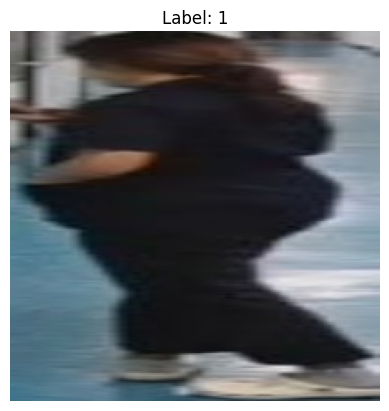

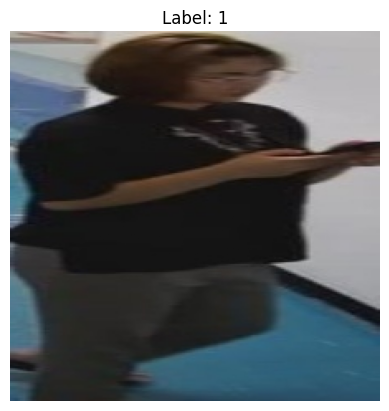

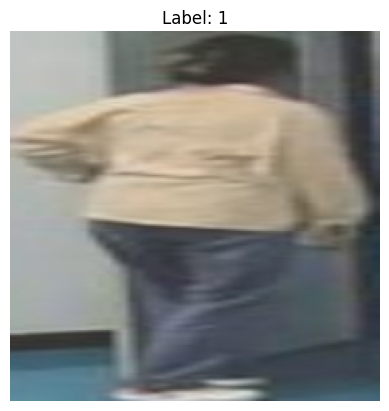

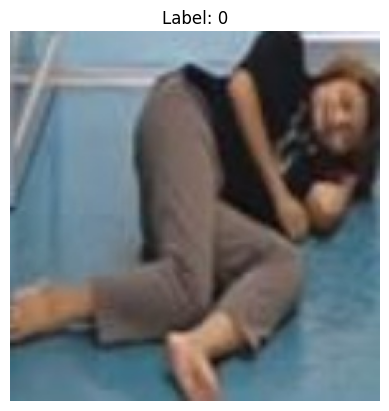

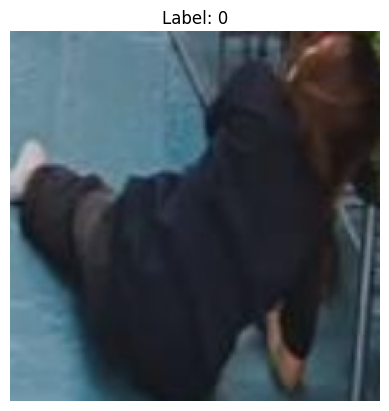

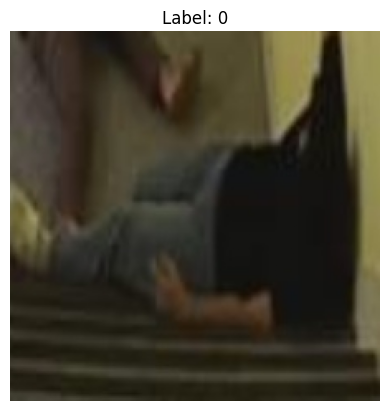

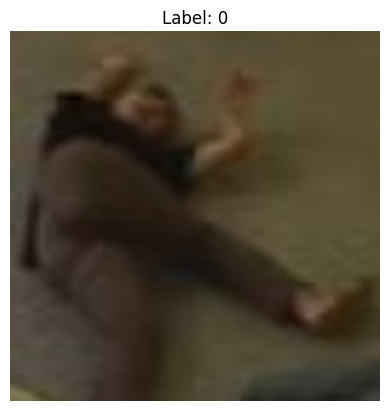

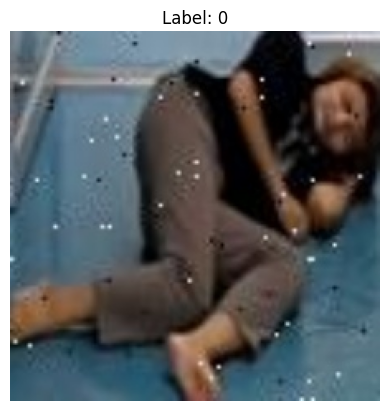

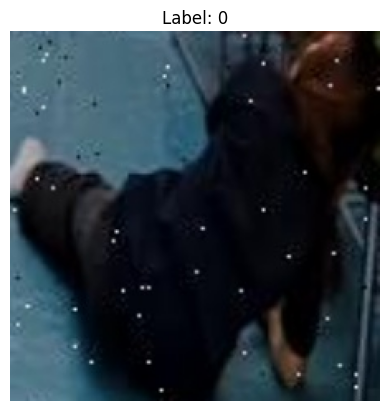

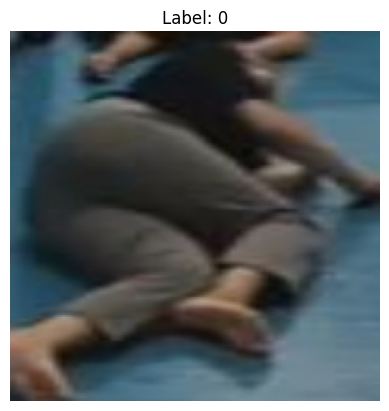

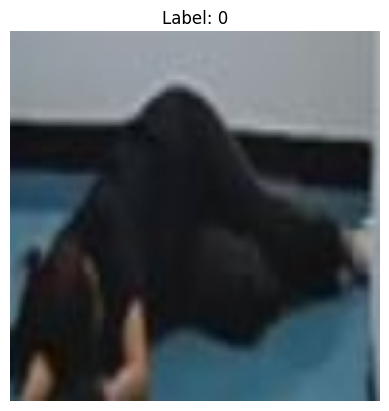

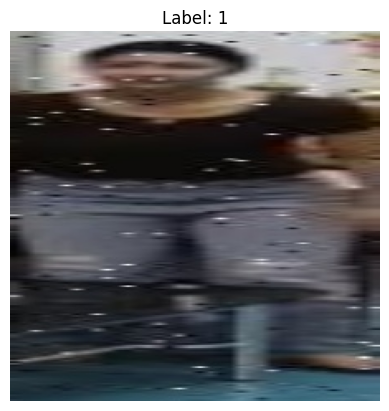

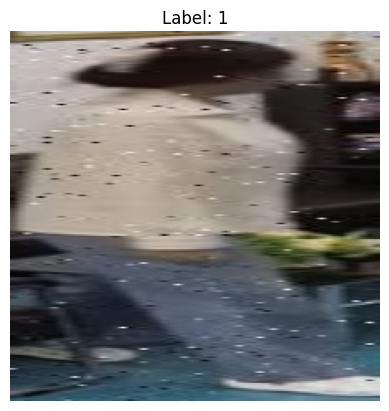

In [ ]:
# @title CHECK DATASET
import sys
from torchvision.transforms  import Compose , Resize,ToTensor,RandomAffine, ColorJitter,Normalize
sys.path.append('/content/drive/MyDrive/BTL_TTCS')
from Dataset_Classification import Falling_Dataset4Clss
# @title DATALOADER

def make_dataset(type_data):
  transform = Compose([
      Resize((224, 224)),
      ToTensor()
  ])

  dataset = Falling_Dataset4Clss(
      root='/content/drive/MyDrive/BTL_TTCS/dataset_classification3',
      type_data = type_data,
      transform = transform
  )

  return dataset

train_dataset = make_dataset('train')
test_dataset = make_dataset('valid')
import torch
import matplotlib.pyplot as plt
import numpy as np

# Hàm unnormalize nếu bạn đã dùng Normalize trước đó
def unnormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    return img_tensor * std[:, None, None] + mean[:, None, None]

for i in range(21420 , 21433 ):
    img, label = train_dataset.__getitem__(i)  # hoặc train_dataset.__getitem__(i)

    # Nếu ảnh đã normalize, hãy bỏ comment dòng dưới:
    # img = unnormalize(img)

    img = img.permute(1, 2, 0)  # Chuyển shape từ (C, H, W) → (H, W, C)
    img = img.numpy()  # Chuyển sang numpy array

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Label: {label}')
    plt.show()



In [ ]:
# @title Zip DATA
import zipfile
import os

def zip_folder(folder_path, output_zip_path):
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                # Ghi file với đường dẫn tương đối
                arcname = os.path.relpath(file_path, start=folder_path)
                zipf.write(file_path, arcname)
    print(f"Zipped {folder_path} → {output_zip_path}")

# Ví dụ sử dụng
zip_folder('/content/drive/MyDrive/BTL_TTCS/dataset_classification3', '/content/drive/MyDrive/BTL_TTCS/dataset_classification3.zip')


Zipped /content/drive/MyDrive/BTL_TTCS/dataset_classification3 → /content/drive/MyDrive/BTL_TTCS/dataset_classification3.zip


In [ ]:
# @title DOWNLOAD ENVIROMENT YOLOV5

# Install the ultralytics package
!pip install ultralytics
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

# Navigate to the cloned directory
!cd yolov5

# Install required packages
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 17478, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 17478 (delta 78), reused 36 (delta 31), pack-reused 17360 (from 2)
Receiving objects: 100% (17478/17478), 16.32 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (11985/11985), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-28 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


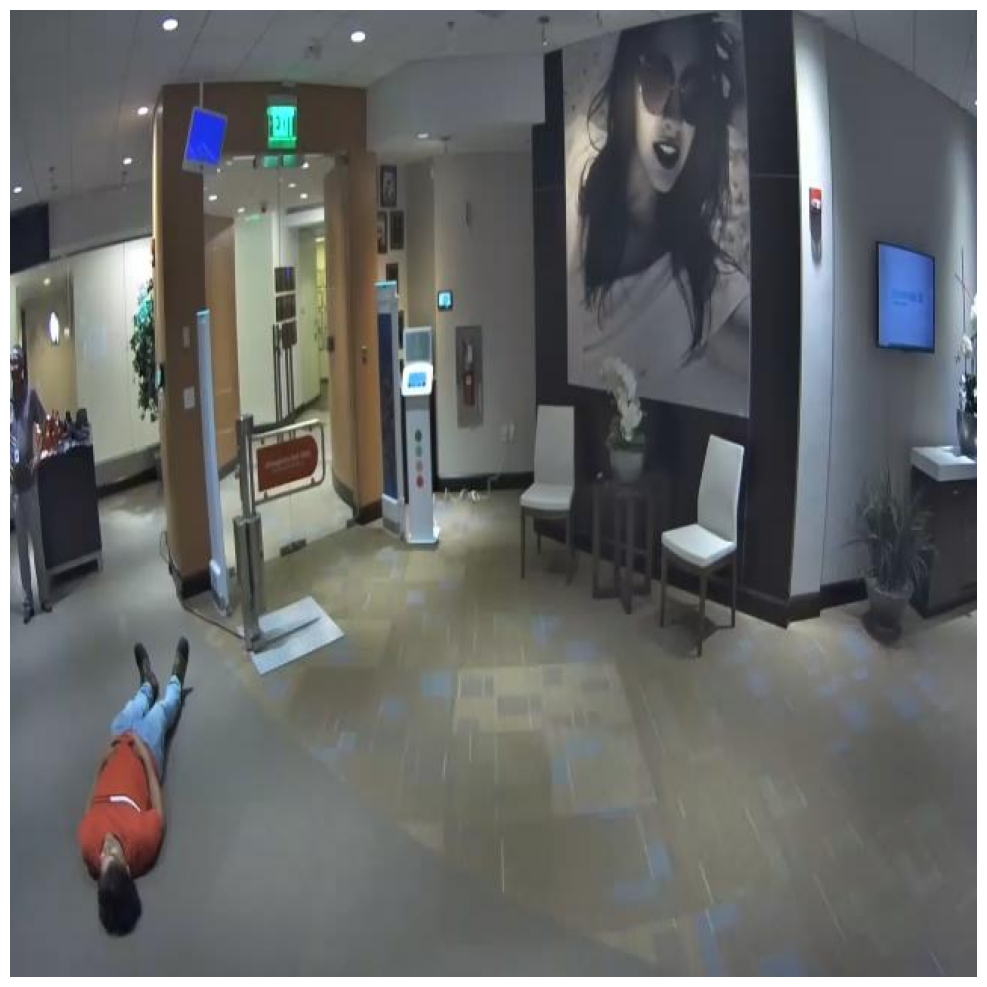

In [ ]:
# @title CHECK ENVIROMENT YOLOV5
%matplotlib inline

import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Load model YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load ảnh
img_path = "/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset4/test/images/Export_20230731_141704-M3045-WV_mp4-66_jpg.rf.18fec8dc9173a129f28211db97ec562e.jpg"   # <-- sửa đúng path ảnh
img = Image.open(img_path).convert('RGB')  # đảm bảo ảnh RGB
img_cv = np.array(img)[:, :, ::-1].copy()   # PIL to OpenCV (BGR)

# Predict
results = model(img)

# Dự đoán bounding box
predictions = results.xyxy[0]
# print(predictions.shape)

# Vẽ bbox chỉ với class 'person'
for *box, conf, cls in predictions:
    if results.names[int(cls)] == 'person':
        x1, y1, x2, y2 = [int(x.item()) for x in box]
        label = f"person {conf:.2f}"
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_cv, label, (x1, max(y1 - 10, 0)), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 0), 2)

# Hiển thị ảnh
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# @title Trainning YOLOV5s
!python /kaggle/working/yolov5/train.py \
    --img 640 \
    --batch 8 \
    --epochs 50 \
    --data /kaggle/input/data-yaml-falling/data.yaml \
    --cfg models/yolov5s.yaml \
    --weights yolov5s.pt \
    --name my-yolov5s-fall-detection \
    --project runs/train \
    --cache



In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 440.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.7 MB/s eta 0:00:00


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-11 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


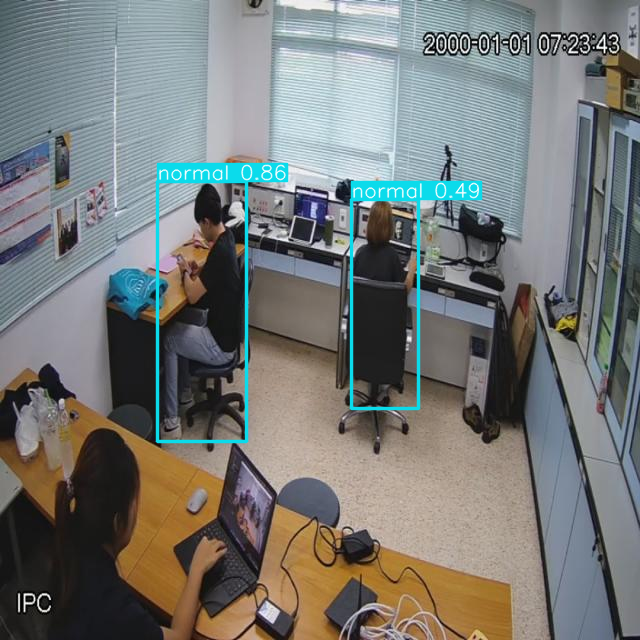

[      xcenter     ycenter      width      height  confidence  class    name
0  201.962723  311.163727  88.514435  260.301270    0.863429      1  normal
1  385.138702  304.141479  67.653198  208.494019    0.486903      1  normal]


In [ ]:
# @title INTERFACE YOLOv5_FINETUNING
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Load mô hình YOLOv5 từ file best.pt
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/BTL_TTCS/Model_yolov5_finetuning/best.pt')

# Đọc ảnh từ file
img = Image.open('/content/drive/MyDrive/BTL_TTCS/dataset_raw/dataset4/valid/images/0_jpg.rf.ab6865f09a98f46175982a12e4a9db21.jpg')

# Thực hiện dự đoán
results = model(img)

# Hiển thị kết quả
results.show()

# Lấy kết quả dưới dạng dataframe (Pandas)
print(results.pandas().xywh)  # In ra thông tin các đối tượng phát hiện (toạ độ, nhãn, độ tin cậy)



In [ ]:
%pip install tensorboard

%tensorboard --logdir=/content/drive/MyDrive/BTL_TTCS/Model_yolov5_finetuning_2/results/yolov5/runs/train/my-yolov5s-fall-detection


UsageError: Line magic function `%tensorboard` not found.


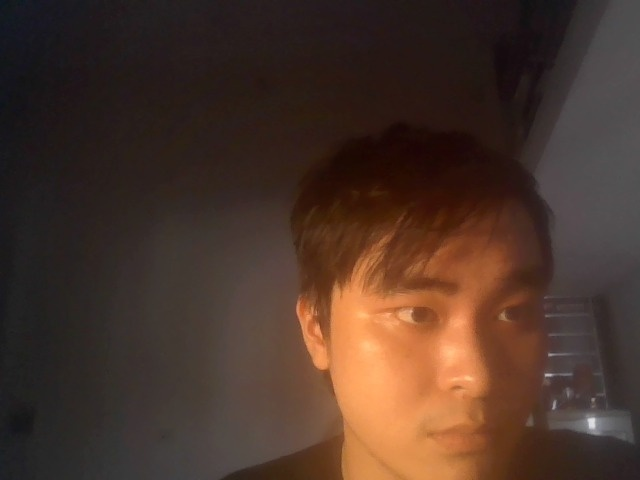

KeyboardInterrupt: 

In [ ]:
import torch
import cv2
from IPython.display import display, Image, clear_output
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np

# --- Load model YOLOv5 ---
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path='/content/drive/MyDrive/BTL_TTCS/Model_yolov5_finetuning_2/results/yolov5/runs/train/my-yolov5s-fall-detection/weights/best.pt')
model.conf = 0.3  # confidence threshold

# --- Hàm bật webcam và chụp 1 frame ---
def capture_frame():
    js_code = """
    async function captureFrame() {
      const video = document.createElement('video');
      const canvas = document.createElement('canvas');
      const context = canvas.getContext('2d');
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });

      document.body.appendChild(video);
      video.srcObject = stream;
      await new Promise(resolve => video.onloadedmetadata = resolve);
      video.play();

      await new Promise(resolve => setTimeout(resolve, 1000));

      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      context.drawImage(video, 0, 0, canvas.width, canvas.height);
      stream.getTracks().forEach(track => track.stop());
      video.remove();

      return canvas.toDataURL('image/jpeg');
    }
    captureFrame();
    """
    data = eval_js(js_code)
    header, encoded = data.split(",", 1)
    img_bytes = b64decode(encoded)
    img_array = np.frombuffer(img_bytes, dtype=np.uint8)
    frame = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return frame

# --- Vòng lặp phát hiện và vẽ BBox realtime ---
while True:
    try:
        frame = capture_frame()

        if frame is None:
            print("Không lấy được frame")
            break

        # Dự đoán bằng YOLOv5
        results = model(frame)
        df = results.pandas().xyxy[0]  # bounding boxes and labels

        # Vẽ bbox thủ công
        for idx, row in df.iterrows():
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            label = row['name']
            conf = row['confidence']

            # Vẽ khung
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Vẽ nhãn
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        # Hiển thị lên Colab
        _, im_arr = cv2.imencode('.jpg', frame)
        im_bytes = im_arr.tobytes()
        clear_output(wait=True)
        display(Image(data=im_bytes))

    except Exception as e:
        print("Lỗi:", e)
        break
